# [Krusell Smith (1998)](https://www.journals.uchicago.edu/doi/pdf/10.1086/250034)
<!-- Also, though the notebook says it is by you and Melih, the only notations I found were for additions by you -->
<!-- If Melih did not do much, his name does not deserve to be on an equal footing with yours -->
- Original version by Tim Munday 
- Comments and extensions by Tao Wang and Melih Firat
- Further edits by Chris Carroll

### Overview

The benchmark Krusell-Smith model has the following broad features:
   * The aggregate state switches between good and bad with known probabilities
   * All consumers experience the same aggregate state for the economy (good or bad)
   * _ex ante_ there is only one type of consumer, which is infinitely lived
   * _ex post_ heterogeneity arises from uninsurable idiosyncratic income shocks
      * Specifically, individuals are at risk of spells of unemployment
      * In a spell of unemployment, their income is zero
   
Thus, each agent faces two types of uncertainty: About their employment state, and about the income they will earn when employed.  And the values of income and unemployment risk depend on the aggregate state.


### Details

#### Idiosyncratic
Each agent _attempts_ to supply an amount of productive labor $\ell$ in each period.  (Here and below we mostly follow the notation of Krusell and Smith (1998)).

However, whether they _succeed_ in supplying that labor (and earning a corresponding wage) is governed by the realization of the stochastic variable $\epsilon$.  If the agent is unlucky, $\epsilon$ is zero and the agent is unemployed.  The amount of labor they succeed in supplying is thus $\epsilon\ell$.

#### Aggregate
Aggregate output ($\bar{y}$) is produced using a Cobb-Douglas production function using capital and labor. (Bars over variables indicate the aggregate value of a variable that has different values across different idiosyncratic consumers).

$z$ denotes the aggregate shock to productivity. $z$ can take two values, either $z_g$ -- the "good" state, or $z_b < z_g$ -- the "bad" state.  Consumers gain income from providing labor, and from the rental return on any capital they own.  Labor and capital markets are perfectly efficient so both factors are both paid their marginal products.

The agent can choose to save by buying capital $k$ which is bounded below at the borrowing constraint of 0.


Putting all of this together, aggregate output is given by 

\begin{eqnarray}
\bar{y} & = & z\bar{k}^\alpha \bar{\ell}^{1-\alpha}
\end{eqnarray}


The aggregate shocks $z$ follow a first-order Markov chains with the transition probability of moving from state $s$ to state $s'$ denoted by $\pi_{ss'}$. The aggregate shocks and individual shocks are correlated: The probability of being unemployed is higher in bad times, when aggregate productivity is low, than in good times, when aggregate productivity is high.

#### Idiosyncratic and Aggregate Together

The individual shocks satisfy the law of large numbers, and the model is constructed so that the number of agents who are unemployed in the good state always equals $u_g$, and is always $u_b$ in the bad state. Given the aggregate state, individual shocks are independent from each other.

For the individual, the probability of moving between a good state and employment to a bad state and unemployment is denoted $\pi_{gb10}$ with similar notation for the other transition probabilities.

(Krusell and Smith allow for serially correlated unemployment at the idiosyncratic level. Here we will simplify this and have unemployment be serially uncorrelated.)

Finally, $\Gamma$ denotes the current distribution of consumers over capital and employment status, and $H$ denotes the law of motion of this distribution. 

#### The Idiosyncratic Individual's Problem Given the Aggregate State

The individual's problem is:
\begin{eqnarray*}
V(k, \epsilon; \Gamma, z) &=& \max_{k'}\{U(c) + \beta \mathbb{E}[V(k' ,\epsilon'; \Gamma', z')|z, \epsilon]\} \\
c + k' &=& r(\bar{k}, \bar{\ell}, z)k + w(\bar{k}, \bar{\ell}, z)\ell\epsilon + (1-\delta)k \\
\Gamma' &=& H(\Gamma, z, z') \\
k' &\geq& 0 \\
\end{eqnarray*}

Krusell and Smith define an equilibrium as a law of motion $H$, a value function $V$, a rule for updating capital $f$ and pricing functions $r$ and $w$, such that $V$ and $f$ solve the consumers problem, $r$ and $w$ denote the marginal products of capital and labour, and $H$ is consistent with $f$ (i.e. if we add up all of the individual agents capital choices we get the correct distribution of capital).

##### Discussion of the KS Algorithm

In general, $\Gamma$ is a high-dimensional object because it includes the whole distribution of individuals' wealth in the economy. Because the optimal amount to save is a nonlinear function of the level of idiosyncratic $k$, next period's aggregate capital stock $\bar{k}'$ depends on the distribution of the holdings of idiosyncratic $k$ across the population of consumers. Therefore the law of motion $H$ is not a trivial function of the $\Gamma$. 

KS simplified this problem as by noting the following. 

1. The agent cares about the future aggregate aggregate state only insofar as that state affects their own personal value of $c$
1. Future values of $c$ depend on the aggregate state only through the budget constraint
1. The channels by which the budget constraint depends on the aggregate state are:
   * The probability distributions of $\epsilon$ and $z$ are affected by the aggregate state
   * Interest rates and wages depend on the future values of $\bar{k}$ and $\bar{\ell}$
  

Now note that

1. The probability distributions for the future values of $\{\epsilon, z\}$ are known; they are fully determined by the Markov transition matrices
1. The values of $r$ and $w$ are both determined by the future value of $\bar{k}$ (in combination with the exogenous value of $\bar{\ell}$)
1. So the only endogenous object that the agent needs to form expectations about, in order to have a complete rational expectation about everything affecting them, is $\bar{k}$

The key result in Krusell and Smith is the discovery that a very simple linear rule does an extraordinarily good job (though not quite perfect) in forecasting $\bar{k}$

They then argue that, since rationality is surely bounded to some degree, the solution that an agent obtains using a good forecasting rule for $\bar{k}$ is "good enough" to compute an "approximate" solution to the consumer's optimization problem.

They define a generic algorithm to find a forecasting rule for $\bar{k}$ as follows

1. Choose the number of moments $n$ of the distribution of $k$ to be included in the set of variables to forecast $\bar{k}'$. In the simplest case, $n=1$, the only forecasting variable for next period's $\bar{k}'$ is the mean (the first moment, $n=1$)) of current capital, $\bar{k}$.
2. Each individual adopts the same belief about the law motion of these moments, $H_I$ and finds the optimal decision policy, $f_I$, contingent on that guess.
3. Use the optimal policy to simulate a history of aggregate capital with a large number of agents. 
4. Characterize the realized law of motion using the same number of moments $n$ 
5. Compare it with the $H_I$, what is taken as given by individuals. 
6. Iterate until the two converge. 

In the end, the solution to the original problem is well approximated by the following simplified problem:

\begin{eqnarray*}
V(k, \epsilon; \bar k, z) &=& max_{c, k'}\{U(c) + \beta E[V(k' ,\epsilon'; \bar k', z')|z, \epsilon]\} \\
c + k' &=& r(\bar{k}, \bar{\ell}, z)k + w(\bar{k}, \bar{\ell}, z)l\epsilon + (1-\delta)k; \\
\text{When }~ z=z_g \quad \log\bar k' & = & a_0 + a_1 \log\bar k; \\
\text{When }~ z=z_b  \quad  \log\bar k' & = & b_0 + b_1 \log\bar k ; \\
k' &\geq& 0 \\
\end{eqnarray*}

## Implementation Using the HARK Toolkit

#### The Consumer

In [20]:
# Import generic setup tools

# This is a jupytext paired notebook that autogenerates KrusellSmith.py
# which can be executed from a terminal command line via "ipython KrusellSmith.py"
# But a terminal does not permit inline figures, so we need to test jupyter vs terminal
# Google "how can I check if code is executed in the ipython notebook"
def in_ipynb():
    try:
        if str(type(get_ipython())) == "<class 'ipykernel.zmqshell.ZMQInteractiveShell'>":
            return True
        else:
            return False
    except NameError:
        return False

# Determine whether to make the figures inline (for spyder or jupyter)
# vs whatever is the automatic setting that will apply if run from the terminal
if in_ipynb():
    # %matplotlib inline generates a syntax error when run from the shell
    # so do this instead
    get_ipython().run_line_magic('matplotlib', 'inline') 
else:
    get_ipython().run_line_magic('matplotlib', 'auto') 

# Import the plot-figure library matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True

import sys
import os
from copy import copy
from HARK.utilities import plotFuncs, plotFuncsDer

In [21]:
# Import components of HARK needed for solving the KS model
from HARK.ConsumptionSaving.ConsAggShockModel import *
import HARK.ConsumptionSaving.ConsumerParameters as Params

# Markov consumer type that allows aggregate shocks (redundant but instructive)
from HARK.ConsumptionSaving.ConsAggShockModel import AggShockMarkovConsumerType

In [22]:
# This cell defines a dictionary to make an instance of our Krusell-Smith consumer.

# The folded dictionary below contains many parameters to the 
# AggShockMarkovConsumerType agent that are not needed for the KS model
KSAgentDictionary = { 
    "CRRA": 1.0,                           # Coefficient of relative risk aversion
    "DiscFac": 0.99,                       # Intertemporal discount factor
    "LivPrb" : [1.0],                      # Survival probability
    "AgentCount" : 10000,                  # Number of agents of this type (only matters for simulation)
    "aNrmInitMean" : 0.0,                  # Mean of log initial assets (only matters for simulation)
    "aNrmInitStd"  : 0.0,                  # Standard deviation of log initial assets (only for simulation)
    "pLvlInitMean" : 0.0,                  # Mean of log initial permanent income (only matters for simulation)
    "pLvlInitStd"  : 0.0,                  # Standard deviation of log initial permanent income (only matters for simulation)
    "PermGroFacAgg" : 1.0,                 # Aggregate permanent income growth factor (only matters for simulation)
    "T_age" : None,                        # Age after which simulated agents are automatically killed
    "T_cycle" : 1,                         # Number of periods in the cycle for this agent type
# Parameters for constructing the "assets above minimum" grid
    "aXtraMin" : 0.001,                    # Minimum end-of-period "assets above minimum" value
    "aXtraMax" : 20,                       # Maximum end-of-period "assets above minimum" value               
    "aXtraExtra" : [None],                 # Some other value of "assets above minimum" to add to the grid
    "aXtraNestFac" : 3,                    # Exponential nesting factor when constructing "assets above minimum" grid
    "aXtraCount" : 24,                     # Number of points in the grid of "assets above minimum"
# Parameters describing the income process
    "PermShkCount" : 1,                    # Number of points in discrete approximation to permanent income shocks - no shocks of this kind!
    "TranShkCount" : 1,                    # Number of points in discrete approximation to transitory income shocks - no shocks of this kind!
    "PermShkStd" : [0.],                   # Standard deviation of log permanent income shocks - no shocks of this kind!
    "TranShkStd" : [0.],                   # Standard deviation of log transitory income shocks - no shocks of this kind!
    "UnempPrb" : 0.0,                      # Probability of unemployment while working - no shocks of this kind!
    "UnempPrbRet" : 0.00,                  # Probability of "unemployment" while retired - no shocks of this kind!
    "IncUnemp" : 0.0,                      # Unemployment benefits replacement rate
    "IncUnempRet" : 0.0,                   # "Unemployment" benefits when retired
    "tax_rate" : 0.0,                      # Flat income tax rate
    "T_retire" : 0,                        # Period of retirement (0 --> no retirement)
    "BoroCnstArt" : 0.0,                   # Artificial borrowing constraint; imposed minimum level of end-of period assets   
    "cycles": 0,                           # Consumer is infinitely lived
    "PermGroFac" : [1.0],                  # Permanent income growth factor
# New Parameters that we need now    
    'MgridBase': np.array([0.1,0.3,0.6,
                           0.8,0.9,0.98,
                           1.0,1.02,1.1,
                           1.2,1.6,2.0,
                           3.0]),          # Grid of capital-to-labor-ratios (factors)
    'MrkvArray': np.array([[0.825,0.175],
                           [0.175,0.825]]),  # Transition probabilities for macroecon. [i,j] is probability of being in state j next
                                           # period conditional on being in state i this period. 
    'PermShkAggStd' : [0.0,0.0],           # Standard deviation of log aggregate permanent shocks by state. No continous shocks in a state.
    'TranShkAggStd' : [0.0,0.0],           # Standard deviation of log aggregate transitory shocks by state. No continuous shocks in a state.
    'PermGroFacAgg' : 1.0
}

# Here we restate just the "interesting" parts of the consumer's specification

KSAgentDictionary['CRRA']    = 1.0      # Relative risk aversion 
KSAgentDictionary['DiscFac'] = 0.99     # Intertemporal discount factor
KSAgentDictionary['cycles']  = 0        # cycles=0 means consumer is infinitely lived

# KS assume that 'good' and 'bad' times are of equal expected duration
# The probability of a change in the aggregate state is p_change=0.125
p_change=0.125
p_remain=1-p_change

# Macro transition probabilities for AggShockMarkovConsumerType
#   [i,j] is probability of being in state j next period conditional on being in state i this period. 

# Markov transition matrix for the aggregate state: 
# In both states, there is 0.875 chance of staying, 0.125 chance of switching
AggMrkvArray = \
np.array([[p_remain,p_change],  # Probabilities of states 0 and 1 next period if in state 0
          [p_change,p_remain]]) # Probabilities of states 0 and 1 next period if in state 1
KSAgentDictionary['MrkvArray'] = AggMrkvArray

In [23]:
# Create the Krusell-Smith agent as an instance of AggShockMarkovConsumerType 
KSAgent = AggShockMarkovConsumerType(**KSAgentDictionary)

Now we need to specify the income distribution. 

The HARK toolkit allows for two components of labor income: Persistent (or permanent), and transitory.  

Using the KS notation above, a HARK consumer's income is
\begin{eqnarray}
y & = & w p \ell \epsilon 
\end{eqnarray}
where $p$ is the persistent component of income.  Krusell and Smith did not incorporate a persistent component of income, however, so we will simply calibrate $p=1$ for all states.

For each of the two aggregate states we need to specify:
   * The _proportion_ of consumers in the $e$ and the $u$ states
   * The level of persistent/permanent productivity $p$ (always 1)
   * The ratio of actual to permanent productivity in each state $\{e,u\}$
      * In the KS notation, this is $\epsilon\ell$  


In [24]:
# Construct the income distribution for the Krusell-Smith agent
prb_eg = 0.96         # Probability of   employment in the good state
prb_ug = 1-prb_eg     # Probability of unemployment in the good state
prb_eb = 0.90         # Probability of   employment in the bad state
prb_ub = 1-prb_eb     # Probability of unemployment in the bad state
p_ind  = 1            # Persistent component of income is always 1
ell_ug = ell_ub = 0   # Labor supply is zero for unemployed consumers in either agg state
ell_eg = 1.0/prb_eg   # Labor supply for employed consumer in good state
ell_eb = 1.0/prb_eb   # 1=pe_g*ell_ge+pu_b*ell_gu=pe_b*ell_be+pu_b*ell_gu

KSAgent.IncomeDstn[0] = [[np.array([prb_eg,prb_ug]),np.array([p_ind,p_ind]),np.array([ell_eg,ell_ug])], # Agg state good
                         [np.array([prb_eb,prb_ub]),np.array([p_ind,p_ind]),np.array([ell_eb,ell_ub])]  # Agg state bad
  
# IncomeDstn is a list of lists, one for each aggregate Markov state
# Each contains three arrays of floats, representing a discrete approximation to the income process. 
# Order: 
#   state probabilities 
#   idiosyncratic persistent income level by state (KS have no persistent shocks p_ind is always 1.0)
#   idiosyncratic transitory income level by state

Up to this point, individual agents do not have enough information to solve their decision problem yet. What is missing are beliefs about the macro variables $r$ and $w$, both of which are functions of $z$ and $\bar{k}$. 

#### The Aggregate Economy

In [25]:
from HARK.ConsumptionSaving.ConsAggShockModel import CobbDouglasMarkovEconomy

KSEconomyDictionary = {
    'PermShkAggCount': 1, 
    'TranShkAggCount': 1, 
    'PermShkAggStd': [0.0,0.0], 
    'TranShkAggStd': [0.0,0.0], 
    'DeprFac': 0.025, # Depreciation factor
    'CapShare': 0.36, # Share of capital income in cobb-douglas production function
    'DiscFac': 0.99,
    'CRRA': 1.0,
    'PermGroFacAgg': [1.0,1.0],
    'AggregateL':1.0, # Not sure on this. Looks like we have fixed the labour level...
    'act_T':1200, # Number of periods for economy to run in simulation
    'intercept_prev': [0.0,0.0], # Make some initial guesses at linear savings rule intercepts for each state
    'slope_prev': [1.0,1.0], # Make some initial guesses at linear savings rule slopes for each state
    'MrkvArray': np.array([[0.875,0.125],
                           [0.125,0.875]]), # Transition probabilities
    'MrkvNow_init': 0   # Pick a state to start in (we pick the first state)
}

# The 'interesting' parts of the CobbDouglasMarkovEconomy
KSEconomyDictionary['CapShare']  = 0.36
KSEconomyDictionary['MrkvArray'] = AggMrkvArray

KSEconomy = CobbDouglasMarkovEconomy(agents = [KSAgent], **KSEconomyDictionary) # Combine production and consumption sides into an "Economy"

We have now populated the $\texttt{KSEconomy}$ with $\texttt{KSAgents}$ defined before. That is basically telling the agents to take the macro state from the $\texttt{KSEconomy}$. 

Now we construct the $\texttt{AggShkDstn}$ that specifies the evolution of the dynamics of the $\texttt{KSEconomy}$.

The structure of the inputs for $\texttt{AggShkDstn}$ follows the same logic as for $\texttt{IncomeDstn}$. Now there is only one possible outcome for each aggregate state (the KS aggregate states are very simple), therefore, each aggregate state has only one possible condition which happens with probability 1.

In [26]:
Perm_g = Perm_b = 1.0 # No aggregate permanent shocks
Tran_g = 1.01 # Productivity in the good aggregate state
Tran_b = 0.99

KSAggShkDstn = [
    [np.array([1.0]),np.array([Perm_g]),np.array([Tran_g])],
    [np.array([1.0]),np.array([Perm_b]),np.array([Tran_b])]
]


KSEconomy.AggShkDstn = KSAggShkDstn
 
# Aggregate productivity shock distribution by state.
# First element is probabilities of different outcomes, given the state you are in. 
# Second element is agg permanent shocks (here we don't have any, so just they are just 1.).
# Third  element is agg transitory shocks, which are calibrated the same as in Krusell Smith.

#### Summing Up

The combined idiosyncratic and aggregate assumptions can be summarized mathematically as follows.

$\forall \{s,s'\}=\{g,b\}\times\{g,b\}$, the following two conditions hold:

$$\underbrace{\pi_{ss'01}}_{p(s \rightarrow s',u \rightarrow e)}+\underbrace{\pi_{ss'00}}_{p(s \rightarrow s', u \rightarrow u)} = \underbrace{\pi_{ss'11}}_{p(s\rightarrow s', e \rightarrow e) }  + \underbrace{\pi_{ss'10}}_{p(s \rightarrow s', e \rightarrow u)} = \underbrace{\pi_{ss'}}_{p(s\rightarrow s')}$$

$$u_s \frac{\pi_{ss'00}}{\pi_{ss'}}+ (1-u_s) \frac{\pi_{ss'10}}{\pi_{ss'}} = u_{s'}$$

### Solving the Model
Now, we have fully defined all of the elements of the macroeconomy, and we are in postion to construct an object that represents the economy and to construct a rational expectations equilibrium.

In [27]:
# Construct the economy, make an initial history, then solve 

KSAgent.getEconomyData(KSEconomy) # Makes attributes of the economy, attributes of the agent

KSEconomy.makeAggShkHist() # Make a simulated history of the economy

# Solve macro problem by finding a fixed point for beliefs

KSEconomy.solve() # Solve the economy using the market method. 
# i.e. guess the saving function, and iterate until a fixed point

intercept=[-0.38266000690730878, -0.37779831427668004], slope=[1.0943006435744063, 1.0934356265328735], r-sq=[0.99990076300977626, 0.99981018501870222]
intercept=[-0.11933375285181119, -0.11859682468363927], slope=[1.002056729884891, 1.001894858579818], r-sq=[0.99999848532729274, 0.99999771392101167]
intercept=[-0.064703305547204146, -0.064571885825468994], slope=[1.005418108081318, 1.0053908441410313], r-sq=[0.99999999976275555, 0.99999999978792364]
intercept=[-0.34738561649884814, -0.35911408629299052], slope=[1.0789089579282567, 1.0831729490225988], r-sq=[0.99996536599126895, 0.99995159029925096]
intercept=[-0.088164352699138346, -0.087690940027663797], slope=[0.99766870152432374, 0.99756108477477146], r-sq=[0.999999951601929, 0.99999993719349034]
intercept=[-0.074651094501926724, -0.074600399178690102], slope=[1.0073883844293037, 1.0073782443454635], r-sq=[0.99999999930571937, 0.99999999935155315]
intercept=[-0.34396416683016739, -0.35680167556477077], slope=[1.0775335219960203, 1.

The last line above is the converged aggregate saving rule for good and bad times, respectively.

Aggregate savings as a function of aggregate market resources:


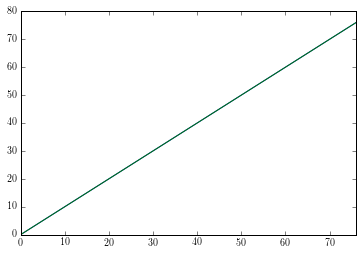

Consumption function at each aggregate market resources gridpoint (in general equilibrium):


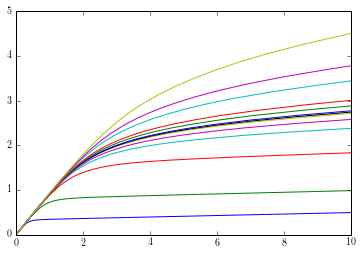

Saving at each individual market resources gridpoint (in general equilibrium):


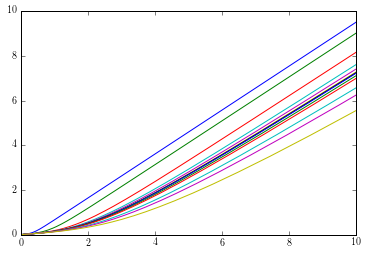

In [28]:
# Plot some key results

print('Aggregate savings as a function of aggregate market resources:')
plotFuncs(KSEconomy.AFunc,0.1,2*KSEconomy.kSS)

print('Consumption function at each aggregate market resources gridpoint (in general equilibrium):')
KSAgent.unpackcFunc()
m_grid = np.linspace(0,10,200)
KSAgent.unpackcFunc()
for M in KSAgent.Mgrid:
    c_at_this_M = KSAgent.solution[0].cFunc[0](m_grid,M*np.ones_like(m_grid)) #Have two consumption functions, check this
    plt.plot(m_grid,c_at_this_M)
plt.show()

print('Saving at each individual market resources gridpoint (in general equilibrium):')
KSAgent.unpackcFunc()
m_grid = np.linspace(0,10,200)
KSAgent.unpackcFunc()
for M in KSAgent.Mgrid:
    s_at_this_M = m_grid-KSAgent.solution[0].cFunc[1](m_grid,M*np.ones_like(m_grid))
    c_at_this_M = KSAgent.solution[0].cFunc[1](m_grid,M*np.ones_like(m_grid)) #Have two consumption functions, check this
    plt.plot(m_grid,s_at_this_M)
plt.show()

### The Wealth Distribution in KS

#### Benchmark Model


In [29]:
sim_wealth = KSEconomy.aLvlNow[0]

print("The mean of individual wealth is "+ str(sim_wealth.mean()) + ";\n the standard deviation is "
      + str(sim_wealth.std())+";\n the median is " + str(np.median(sim_wealth)) +".")

The mean of individual wealth is 25.2595466865;
 the standard deviation is 5.12755806898;
 the median is 25.4484373625.


In [30]:
# Get some tools for plotting simulated vs actual wealth distributions
from HARK.utilities import getLorenzShares, getPercentiles

# The cstwMPC model conveniently has data on the wealth distribution 
# from the U.S. Survey of Consumer Finances
from HARK.cstwMPC.SetupParamsCSTW import SCF_wealth, SCF_weights

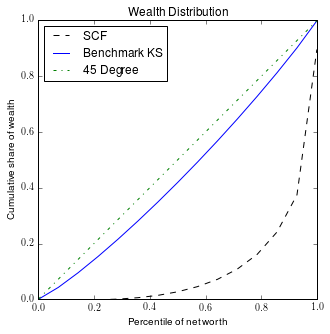

In [31]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001,0.999,15)
SCF_Lorenz_points = getLorenzShares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_Lorenz_points = getLorenzShares(sim_wealth,percentiles=pctiles)

# Plot 
plt.figure(figsize=(5,5))
plt.title('Wealth Distribution')
plt.plot(pctiles,SCF_Lorenz_points,'--k',label='SCF')
plt.plot(pctiles,sim_Lorenz_points,'-b',label='Benchmark KS')
plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.legend(loc=2)
plt.ylim([0,1])
plt.show()

In [32]:
# Calculate a measure of the difference between the simulated and empirical distributions
lorenz_distance = np.sqrt(np.sum((SCF_Lorenz_points - sim_Lorenz_points)**2))
print("The Euclidean distance between simulated wealth distribution and the estimates from the SCF data is "+str(lorenz_distance) )

The Euclidean distance between simulated wealth distribution and the estimates from the SCF data is 1.44624205258


#### Heterogeneous Time Preference Rates

As the figures show, the distribution of wealth that the baseline KS model produces is very far from matching the empirical degree of inequality in the US data.

This could matter for macroeconomic purposes.  For example, the SCF data indicate that many agents are concentrated at low values of wealth where the MPC is very large.  We might expect, therefore, that a fiscal policy "stimulus" that gives a fixed amount of money to every agent would have a large effect on the consumption of the low-wealth households who have a high Marginal Propensity to Consume.

KS attempt to address this problem by assuming that an individual agent's time preference rate can change over time.

The rationale is that this represents a generational transition: The "agent" is really a "dynasty" and the time preference rate of the "child" dynast may differ from that of the "parent."

Specifically, KS assume that $\beta$ can take on three values, 0.9858, 0.9894, and 0.9930, and that the transition probabilities are such that 
- The invariant distribution for $\beta$’s has 80 percent of the population at the middle $\beta$ and 10 percent at each of the other $\beta$’s.
- Immediate transitions between the extreme values of $\beta$ occur with probability zero. 
- The average duration of the highest and lowest $\beta$’s is 50 years. 

The HARK toolkit is not natively set up to accommodate stochastic time preference factors (though an extension to accommodate this would be easy).  

Here, instead, we assume that different agents have different values of $\beta$ that are uniformly distributed over some range. We approximate the uniform distribution by seven points.  The agents are heterogeneous _ex ante_ (and permanently).

In [33]:
# Construct the distribution of types
from HARK.utilities import approxUniform

# Specify the distribution of the discount factor
num_types = 3              # number of types we want;
DiscFac_mean   = 0.9858    # center of beta distribution 
DiscFac_spread = 0.0085    # spread of beta distribution
DiscFac_dstn = approxUniform(num_types, DiscFac_mean-DiscFac_spread, DiscFac_mean+DiscFac_spread)[1]
BaselineType = deepcopy(KSAgent)

MyTypes = [] # initialize an empty list to hold our consumer types
for nn in range(len(DiscFac_dstn)):
    # Now create the types, and append them to the list MyTypes
    NewType = deepcopy(BaselineType)
    NewType.DiscFac = DiscFac_dstn[nn]
    NewType.seed = nn # give each consumer type a different RNG seed
    MyTypes.append(NewType)

In [34]:
# Put all agents into the economy
KSEconomy_sim = CobbDouglasMarkovEconomy(agents = MyTypes, **KSEconomyDictionary) 
KSEconomy_sim.AggShkDstn = KSAggShkDstn # Agg shocks are the same as defined earlier

for ThisType in MyTypes:
    ThisType.getEconomyData(KSEconomy_sim) # Makes attributes of the economy, attributes of the agent

KSEconomy_sim.makeAggShkHist() # Make a simulated prehistory of the economy
KSEconomy_sim.solve()          # Solve macro problem by getting a fixed point dynamic rule

**** WARNING: could not execute multiThreadCommands in HARK.core.Market.solveAgents(), so using the serial version instead. This will likely be slower. The multiTreadCommands() functions failed with the following error: 
     <class 'AttributeError'> : Can't pickle local object 'CobbDouglasEconomy.update.<locals>.<lambda>'
intercept=[-0.10914620839790044, -0.10277670163981717], slope=[1.0136019833147489, 1.0121591803339216], r-sq=[0.99997651520252429, 0.99994338195403787]
intercept=[-0.28743921897048241, -0.28817683338830491], slope=[1.0590810537929183, 1.0596640637655401], r-sq=[0.99974707753448622, 0.99951800067065366]
intercept=[-0.20309971183679293, -0.20752498416456377], slope=[1.035062517811117, 1.0365381184926732], r-sq=[0.99986973864812068, 0.99972100814260623]
intercept=[-0.23113547838850632, -0.22742204670998722], slope=[1.043793030572747, 1.0430849908811579], r-sq=[0.99940877454610244, 0.99879338819286989]
intercept=[-0.24144332220270226, -0.24654225752691722], slope=[1.0459

In [35]:
# Get the level of end-of-period assets a for all types of consumers
aLvl_all = np.concatenate([KSEconomy_sim.aLvlNow[i] for i in range(len(MyTypes))])
print('Aggregate capital to income ratio is ' + str(np.mean(aLvl_all)))

Aggregate capital to income ratio is 39.5338402087


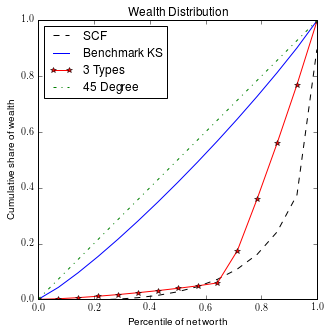

In [65]:
# Plot the distribution of wealth across all agent types
sim_3beta_wealth = aLvl_all
pctiles = np.linspace(0.001,0.999,15)
sim_Lorenz_points = getLorenzShares(sim_wealth,percentiles=pctiles)
SCF_Lorenz_points = getLorenzShares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_3beta_Lorenz_points = getLorenzShares(sim_3beta_wealth,percentiles=pctiles)

## Plot
plt.figure(figsize=(5,5))
plt.title('Wealth Distribution')
plt.plot(pctiles,SCF_Lorenz_points,'--k',label='SCF')
plt.plot(pctiles,sim_Lorenz_points,'-b',label='Benchmark KS')
plt.plot(pctiles,sim_3beta_Lorenz_points,'-*r',label='3 Types')
plt.plot(pctiles,pctiles,'g-.',label='45 Degree')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.legend(loc=2)
plt.ylim([0,1])
plt.show()

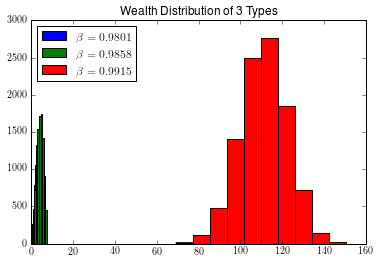

In [66]:
for i in range(len(MyTypes)):
    if i<=2:
        plt.hist(KSEconomy_sim.aLvlNow[i],label=r'\beta='+str(round(DiscFac_dstn[i],4)))
plt.legend(loc=2)
plt.title('Wealth Distribution of 3 Types')

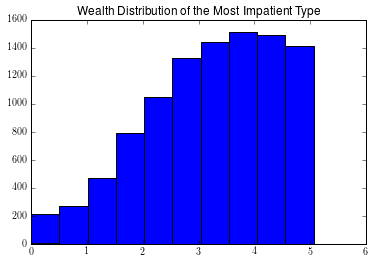

In [67]:
#print('Wealth Distribution of the Most Impatient Type')
plt.hist(KSEconomy_sim.aLvlNow[0])
plt.title('Wealth Distribution of the Most Impatient Type')

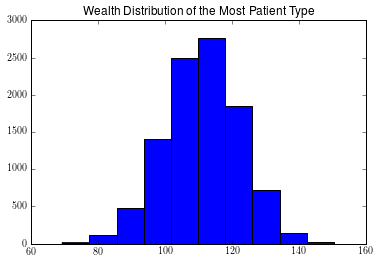

In [68]:
#print('Wealth Distribution of the Most patient Type:')
plt.hist(KSEconomy_sim.aLvlNow[-1])
plt.title('Wealth Distribution of the Most Patient Type')